# Lista de Exercícios sobre Extração do Conhecimento com Mineração de Dados
 Exercícios de programação em Python: Classificação, Regressão e clusterização

In [1]:
# Importação das bibliotecas comuns a todas as questões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

## Classificação

### 1. Classificação com Regressão logisitica

 - Implemente um modelo de Regressão Logística para classificar o conjunto de dados Iris (ou qualquer outro). Avalie o modelo utilizando a métrica de acurácia e a matriz de confusão.

In [2]:
# Importação do modelo
from sklearn.linear_model import LogisticRegression

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Transformando a classe em valores numericos
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data_treino = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
data_classif = np.array(iris['species'])

x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

modelo_regressao_logistica = LogisticRegression(C = 0.7, random_state = 42)
modelo_regressao_logistica.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_regressao_logistica.predict(x_val)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
acuracia = accuracy_score(y_val, lr_predict_test)
print(f'Acuracia: {acuracia:.2%}')

Acuracia: 95.56%


In [7]:
matriz_confusao = confusion_matrix(y_val, lr_predict_test)
matriz_confusao

array([[16,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 16]])

### 2. Classificação com K-Nearest Neighbors (KNN)

- Construa um modelo KNN para prever a classe de um conjunto de dados (por exemplo, Wine). Utilize validação cruzada para ajustar o número de vizinhos e avalie o desempenho com a metrica F1-Score

In [8]:
# Importando modelo e dataset
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

wine = load_wine()
X = wine.data
y = wine.target
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
# Fazendo validação cruzada com GridSearchCV
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier()

parametros = {
    'n_neighbors' : [3,4,5,6,7,8,9,10,11]
}


melhor_modelo = GridSearchCV(estimator = knn, param_grid = parametros, cv=5, scoring = 'accuracy')
melhor_modelo.fit(X_train, y_train)

modelo_final = melhor_modelo.best_estimator_
modelo_final.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [10]:
y_previsto = modelo_final.predict(X_test)

In [11]:
score_teste = modelo_final.score(X_test, y_test)
score_teste

0.7037037037037037

In [12]:
f1 = f1_score(y_test, y_previsto, average='macro')
print(f'F1-Score: {f1:.2%}')

F1-Score: 65.19%


### 3. Classificação com Support Vector Machines (SVM)- 	Treine um modelo de SVM no conjunto de dados Breast Cancer. Use a métrica de precisão (precision) e recall para avaliar o modelo.


In [13]:
# Importar modelo e conjunto de dados
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [14]:
# Carregar o dataset Breast Cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [15]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Criar e treinar o modelo SVM
model = SVC(kernel='linear')  # Usando um kernel linear
model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [18]:
# Calcular a precisão e o recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precisão: {precision:.2%}')
print(f'Recall: {recall:.2%}')

Precisão: 96.36%
Recall: 98.15%


### 4. Classificação com Árvores de Decisão- 	Implemente uma árvore de decisão para classificar o conjunto de dados Titanic. Use a métrica ROC-AUC para avaliar a performance do modelo.


In [19]:
# Importa modelo
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Carrega conjunto de dados do Titanic
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Seleciona colunas relevantes
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [22]:
# verifica valores ausentes
print(titanic.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [23]:
# Preenche idades ausentes com a mediana
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Converte variáveis categóricas em numéricas
titanic = pd.get_dummies(titanic, drop_first=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [24]:
# Separar características (X) e rótulo (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Criar e treinar o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
# Fazer previsões no conjunto de teste
y_pred = modelo_arvore.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva

In [27]:
# Calcular a métrica ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)

print(f'ROC-AUC: {roc_auc:.2%}')

ROC-AUC: 74.26%


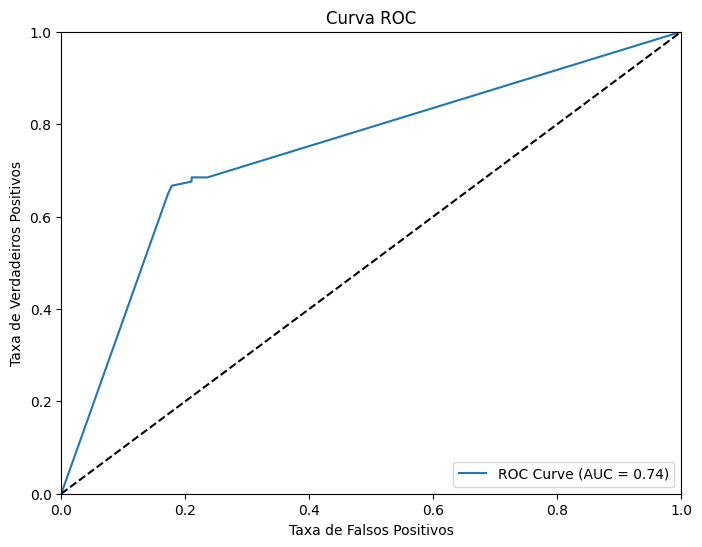

In [28]:
# Calcular os valores da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


### 5. Classificação com Random Forest- 	Crie um modelo Random Forest para prever dígitos escritos à mão (utilize o conjunto de dados Digits do Scikit-Learn). Avalie o modelo utilizando a matriz de confusão e o F1-Score.


In [29]:
# Importa conjunto de dados e modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [30]:
# Carregar o dataset Digits
digits = load_digits()

# Criar um DataFrame a partir dos dados
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
digits_df['target'] = digits.target

# Exibir as primeiras linhas do DataFrame
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [31]:
# Separar características (X) e rótulo (y)
X = digits.data
y = digits.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Criar e treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [34]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calcular o F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'F1-Score: {f1:.2%}')

F1-Score: 97.59%


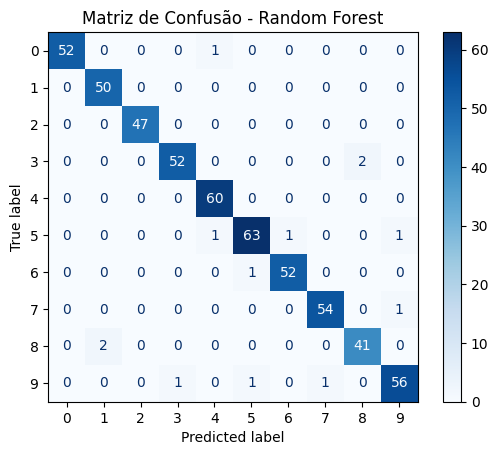

In [35]:
# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

### 6. Classificação com Gradient Boosting- 	Treine um modelo de Gradient Boosting no conjunto de dados Breast Cancer. Compare o desempenho utilizando a métrica ROC-AUC e a curva ROC.


In [36]:
# Importa modelo e conjunto de dados
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
# Carregar o dataset Breast Cancer
cancer = load_breast_cancer()

# Criar um DataFrame a partir dos dados
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

# Exibir as primeiras linhas do DataFrame
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
# Separar características (X) e rótulo (y)
X = cancer.data
y = cancer.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Criar e treinar o modelo Gradient Boosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [40]:
# Fazer previsões no conjunto de teste
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva

# Calcular a métrica ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.2%}')

ROC-AUC: 99.51%


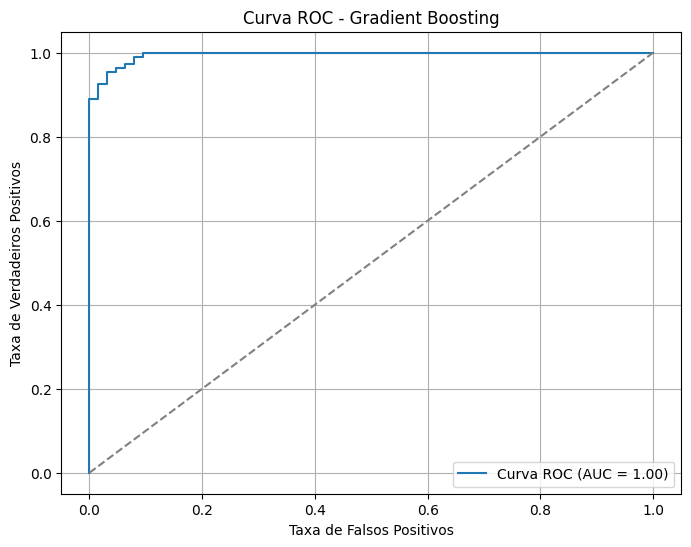

In [41]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha de referência
plt.title('Curva ROC - Gradient Boosting')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 7. Classificação Multiclasse com Naive Bayes
- Utilize o Naive Bayes para realizar classificação multiclasse no conjunto de dados Iris. Avalie o desempenho utilizando a precisão média ponderada (weighted precision) e a matriz de confusão.


In [42]:
# Importa modelo e conjunto
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

In [43]:
# Carregar o dataset Iris
iris = load_iris()

# Criar um DataFrame a partir dos dados
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Exibir as primeiras linhas do DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
# Separar características (X) e rótulo (y)
X = iris.data
y = iris.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Criar e treinar o modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [46]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [47]:
# Calcular a precisão média ponderada
weighted_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão Média Ponderada: {weighted_precision:.2%}')

Precisão Média Ponderada: 97.94%


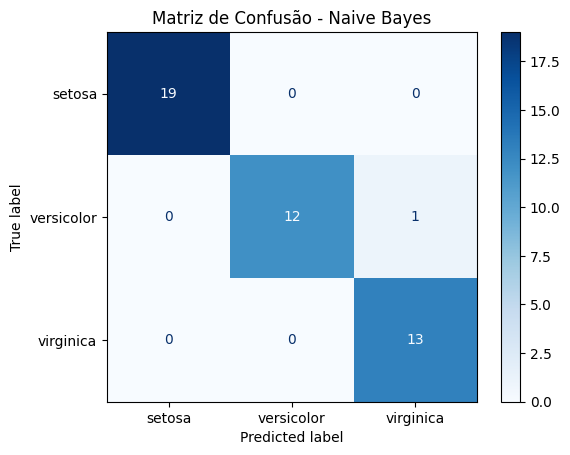

In [48]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()

## Regressão

### 8. Regressão Linear Simples- 	Implemente a regressão linear simples para prever o preço de casas usando o conjunto de dados Boston Housing. Avalie o modelo utilizando o R² e o erro médio absoluto (MAE).


In [49]:
# Importa conjunto de dados e modelo
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [50]:
# Carregar o dataset Boston Housing
boston = load_boston()

# Criar um DataFrame a partir dos dados
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

# Exibir as primeiras linhas do DataFrame
boston_df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
# Separar características (X) e rótulo (y)
X = boston_df[['RM']]  # Usando apenas a variável 'RM' como preditor
y = boston_df['MEDV']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [54]:
# Calcular R² e MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2:.2%}')
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')

R²: 45.85%
Erro Médio Absoluto (MAE): 4.31


### 9. Regressão Linear Múltipla- 	Utilize regressão linear múltipla para prever o consumo de energia com base em várias variáveis. Avalie o desempenho utilizando o erro médio quadrático (MSE) e o R².


In [55]:
# Carrega dataset (não achei nos arquivos dataset de consumo de energia, então vou usar esse)
energia = pd.read_csv('powerconsumption.csv')
energia.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [56]:
# Selecionar colunas desejadas
energia = energia[['Temperature','PowerConsumption_Zone1']]

In [57]:
# Separar características (X) e rótulo (y)
X = energia.iloc[:, :-1]
y = energia.iloc[:, -1]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# Inicializar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [60]:
# Calcular o Erro Médio Quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular o Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print(f'Erro Médio Quadrático (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2:.2%}')

Erro Médio Quadrático (MSE): 41179027.180761516
Coeficiente de Determinação (R²): 19.39%


### 10. Regressão com KNN- 	Aplique KNN para realizar uma tarefa de regressão em um conjunto de dados como Airfoil Self-Noise. Compare o desempenho do modelo com a regressão linear usando MSE.
